In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [5]:

!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-04-04 14:03:39--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.005s  

2019-04-04 14:03:39 (4.75 MB/s) - ‘loan_train.csv’ saved [23101/23101]



In [6]:
df = pd.read_csv("loan_train.csv")
# take a look at the dataset
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


### Convert to date time object


In [8]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [9]:
### Preprocessing

In [10]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [12]:
df['Principal'].value_counts()

1000    258
800      81
300       3
500       2
900       2
Name: Principal, dtype: int64

In [35]:
df['education'].value_counts()


High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [14]:
df['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [22]:
cdf = df[['loan_status','Principal','education','Gender','age','terms']]
cdf.head(9)

,loan_status,Principal,education,Gender,age,terms
0,PAIDOFF,1000,High School or Below,male,45,30
1,PAIDOFF,1000,Bechalor,female,33,30
2,PAIDOFF,1000,college,male,27,15
3,PAIDOFF,1000,college,female,28,30
4,PAIDOFF,1000,college,male,29,30
5,PAIDOFF,1000,college,male,36,30
6,PAIDOFF,1000,college,male,28,30
7,PAIDOFF,800,college,male,26,15
8,PAIDOFF,300,college,male,29,7


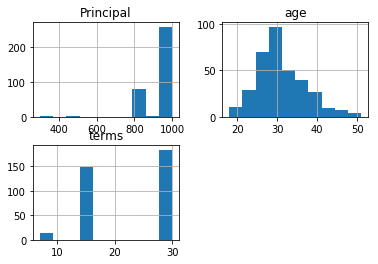

In [23]:
viz = cdf[['loan_status','Principal','education','Gender','age','terms']]
viz.hist()
plt.show()

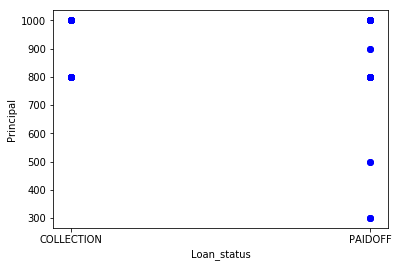

In [18]:
plt.scatter(cdf.loan_status, cdf.Principal,  color='blue')
plt.xlabel("Loan_status")
plt.ylabel("Principal")
plt.show()

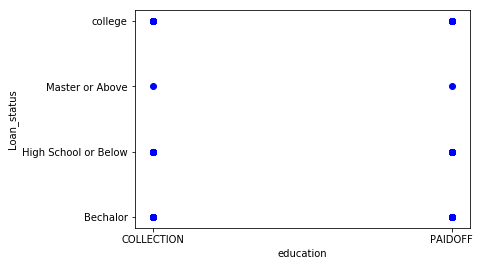

In [19]:
plt.scatter(cdf.loan_status, cdf.education,  color='blue')
plt.xlabel("education")
plt.ylabel("Loan_status")
plt.show()

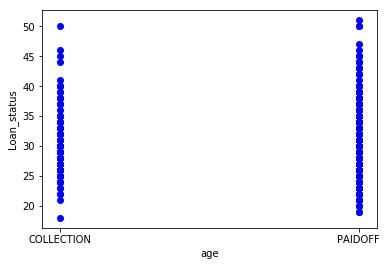

In [24]:
plt.scatter(cdf.loan_status, cdf.age,  color='blue')
plt.xlabel("age")
plt.ylabel("Loan_status")
plt.show()

In [25]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [26]:
!conda install -c anaconda seaborn -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00  47.85 MB/s


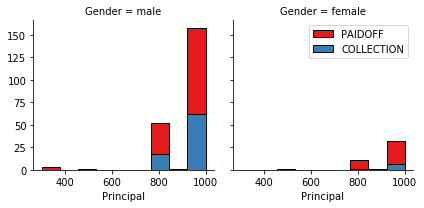

In [27]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

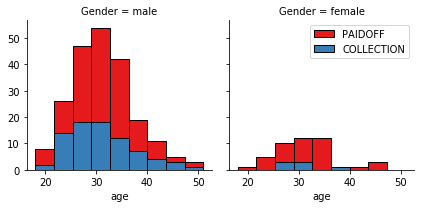

In [28]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## look at the day of the week people get the loan

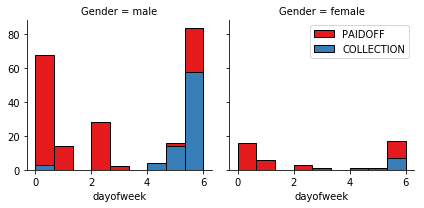

In [31]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

## People who get the loan at the end of the week dont pay it off. Set a threshold values less then day 4 with Feature binarization

In [33]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [34]:
## Lets convert male to 0 and female to 1:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [37]:
## Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame
## Above we saw that Master and Above only has 2 members, so lets remove.

In [38]:
df_new = df[['Principal','terms','age','Gender','weekend']]
df_new = pd.concat([df_new,pd.get_dummies(df['education'])], axis=1)
df_new['college']=df_new['college'] + df_new['Bechalor']
df_new.drop(['Master or Above'], axis = 1,inplace=True)
df_new.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,1
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [41]:
## Lets defind feature sets, X:
X=df_new
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,1
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [42]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [43]:
## Data Standardization give data zero mean and unit variance 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -1.12313753],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669,  0.89036291],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  0.89036291],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  0.89036291],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  0.89036291]])

In [44]:
## K Nearest Neighbor


In [45]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


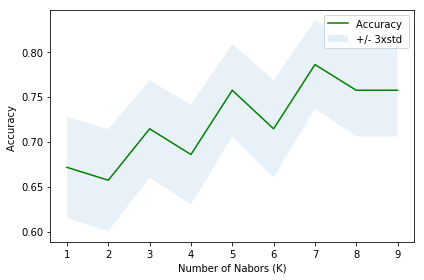

In [46]:
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
kmean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh=KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    kmean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

kmean_acc
plt.plot(range(1,Ks),kmean_acc,'g')
plt.fill_between(range(1,Ks),kmean_acc - 1 * std_acc,kmean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()


In [47]:
neigh=KNeighborsClassifier(n_neighbors = kmean_acc.argmax()+1).fit(X_train,y_train)
print( "For KNN, the best accuracy using Loan_train was", round(kmean_acc.max(),4), "with k=", kmean_acc.argmax()+1)

For KNN, the best accuracy using Loan_train was 0.7857 with k= 7


In [48]:
## Decision Tree

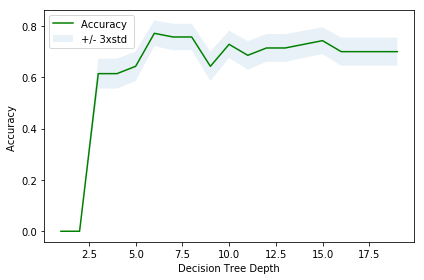

In [49]:
from sklearn.tree import DecisionTreeClassifier
Ks = 20
dmean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(3,Ks):
    
    #Train Model and Predict  
    LendTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    LendTree.fit(X_train,y_train)
    predTree = LendTree.predict(X_test)
    dmean_acc[n-1] = metrics.accuracy_score(y_test, predTree)    
    std_acc[n-1]=np.std(predTree==y_test)/np.sqrt(predTree.shape[0])

plt.plot(range(1,Ks),dmean_acc,'g')
plt.fill_between(range(1,Ks),dmean_acc - 1 * std_acc,dmean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Decision Tree Depth')
plt.tight_layout()
plt.show()

In [50]:
LendTree = DecisionTreeClassifier(criterion="entropy", max_depth = dmean_acc.argmax()+1)
LendTree.fit(X_train,y_train)
print( "For Decision Tree, the best accuracy using Loan_train was", round(dmean_acc.max(),4),
      "with Depth=", dmean_acc.argmax()+1)

For Decision Tree, the best accuracy using Loan_train was 0.7714 with Depth= 6


In [51]:
## Support Vector MAchine


In [52]:
import scipy.optimize as opt
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
yhat3 = clf.predict(X_test)
yhat3 [0:5]

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

             precision    recall  f1-score   support

 COLLECTION       0.36      0.27      0.31        15
    PAIDOFF       0.81      0.87      0.84        55

avg / total       0.72      0.74      0.73        70

Confusion matrix, without normalization
[[48  7]
 [11  4]]


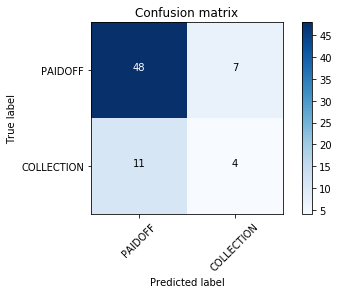

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat3, labels=['PAIDOFF','COLLECTION'])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat3))


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF','COLLECTION'],normalize= False,  title='Confusion matrix')
    

In [55]:
## Logistic Regressions


In [56]:
from sklearn.linear_model import LogisticRegression

C = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 0.5, 0.7, 1, 3, 10, 30, 100]
lmean_acc =np.zeros(len(C))
i=0
for c in C:
    LR = LogisticRegression(C=c, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    lmean_acc[i] = metrics.accuracy_score(y_test, yhat)
    i=i+1
print( "The best accuracy was with", round(lmean_acc.max(),4), "with c=", C[lmean_acc.argmax()+1]) 
c_opt=C[lmean_acc.argmax()+1]
LR = LogisticRegression(C=c_opt, solver='liblinear').fit(X_train,y_train)

The best accuracy was with 0.7429 with c= 0.3


In [57]:
## model evolution

In [58]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [60]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-04-04 16:23:11--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-04-04 16:23:11 (695 MB/s) - ‘loan_test.csv’ saved [3642/3642]



In [61]:
## Load test set


In [62]:
df2 = pd.read_csv('loan_test.csv')
df2['due_date'] = pd.to_datetime(df2['due_date'])
df2['effective_date'] = pd.to_datetime(df2['effective_date'])
df2['dayofweek'] = df2['effective_date'].dt.dayofweek
df2['weekend'] = df2['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df2['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature2 = df2[['Principal','terms','age','Gender','weekend']]
Feature2 = pd.concat([Feature2,pd.get_dummies(df2['education'])], axis=1)
Feature2['college']=Feature2['college'] + Feature2['Bechalor']
Feature2.drop(['Master or Above'], axis = 1,inplace=True)
X2=Feature2
y2 = df2['loan_status'].values
X2= preprocessing.StandardScaler().fit(X2).transform(X2)



In [63]:
yhat2=neigh.predict(X2)
predTree = LendTree.predict(X2)
yhat5 = clf.predict(X2)
yhat6 = LR.predict(X2)
yhat6_prob = LR.predict_proba(X2)

In [64]:
jssknn=round(jaccard_similarity_score(y2,yhat2),4)
jssdt=round(jaccard_similarity_score(y2,predTree),4)
jsssvm=round(jaccard_similarity_score(y2,yhat5),4)
jsslr=round(jaccard_similarity_score(y2,yhat6),4)
f1sknn=round(f1_score(y2,yhat2,average='micro',sample_weight=None),4)
f1sdt=round(f1_score(y2,predTree,average='micro',sample_weight=None),4)
f1ssvm=round(f1_score(y2,yhat5,average='micro',sample_weight=None),4)
f1slr=round(f1_score(y2,yhat6,average='micro',sample_weight=None),4)
lllr=round(log_loss(y2,yhat6_prob, eps = 1e-15),4)

In [65]:
finaldata={'Algorithm':['KNN','Decision Tree','SVM','Logistic Regression'],
                   'Jaccard':[jssknn,jssdt,jsssvm,jsslr],'F1-Score':[f1sknn,f1sdt,f1ssvm,f1slr],
                   'LogLoss':['NA','NA','NA',lllr]}
report=pd.DataFrame(data=finaldata)
print('The following table is for the predictions for data set Loan_Test using model created using Loan_Train')
print("K=",kmean_acc.argmax()+1," for KNN, Depth=",dmean_acc.argmax()+1,"for Decision Tree. See Accuracy charts above.")
print('NOTE: Feature set used is different from that set up by instructor')
report

The following table is for the predictions for data set Loan_Test using model created using Loan_Train
K= 7  for KNN, Depth= 6 for Decision Tree. See Accuracy charts above.
NOTE: Feature set used is different from that set up by instructor


,Algorithm,F1-Score,Jaccard,LogLoss
0,KNN,0.6667,0.6667,NA
1,Decision Tree,0.7222,0.7222,NA
2,SVM,0.7963,0.7963,NA
3,Logistic Regression,0.7407,0.7407,0.4693
